In [101]:
# Importing dependencies
import pandas as pd
import numpy as np
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')
from scipy.stats import linregress
from matplotlib import pyplot as plt, ticker as mticker

In [46]:
# Read in CSV files for data cleaning  ** MAKE SURE THIS IS CORRECT WHEN COMMITTED TO MAIN BRANCH **
life_expectancy = pd.read_csv("Resources/Life_expectancy_world_bank_20_years.csv")
suicide_rate = pd.read_csv("Resources/Suicide_mortality_rate_world_bank_20_years.csv")
unemployment = pd.read_csv("Resources/Unemployment_rates_world_bank_20_years.csv")


In [47]:
# Convert data to DataFrames
life_expectancy_df = pd.DataFrame(life_expectancy)
suicide_rate_df = pd.DataFrame(suicide_rate)
unemployment_df = pd.DataFrame(unemployment)


### Life Expectancy 2002 - 2019

In [48]:
life_expectancy_df.head()


,Series Name,Series Code,Country Name,Country Code,2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Afghanistan,AFG,56.454,57.344,57.944,58.361,58.684,59.111,...,61.923,62.417,62.545,62.659,63.136,63.016,63.081,63.565,62.575,..
1,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Albania,ALB,75.89,76.142,76.376,76.621,76.816,77.549,...,78.064,78.123,78.407,78.644,78.86,79.047,79.184,79.282,76.989,..
2,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Algeria,DZA,71.23,71.287,71.762,72.061,72.334,72.602,...,74.202,74.615,75.11,75.622,75.732,75.743,76.066,76.474,74.453,..
3,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Andorra,AND,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [49]:
# # Drop columns not needed
life_expectancy_df = life_expectancy_df.drop(columns=['Series Code', 'Series Name', 
                                                      '2020 [YR2020]', '2021 [YR2021]'])


In [50]:
# Rename columns for years
life_expectancy_df_renamed = life_expectancy_df.rename(columns={'2002 [YR2002]' : '2002',
                                                                '2003 [YR2003]' : '2003',
                                                                '2004 [YR2004]' : '2004',
                                                                '2005 [YR2005]' : '2005',
                                                                '2006 [YR2006]' : '2006',
                                                                '2007 [YR2007]' : '2007',
                                                                '2008 [YR2008]' : '2008',
                                                                '2009 [YR2009]' : '2009',
                                                                '2010 [YR2010]' : '2010',
                                                                '2011 [YR2011]' : '2011',
                                                                '2012 [YR2012]' : '2012',
                                                                '2013 [YR2013]' : '2013',
                                                                '2014 [YR2014]' : '2014',
                                                                '2015 [YR2015]' : '2015',
                                                                '2016 [YR2016]' : '2016',
                                                                '2017 [YR2017]' : '2017',
                                                                '2018 [YR2018]' : '2018',
                                                                '2019 [YR2019]' : '2019'  
})


In [51]:
# Replace all empty values and '..' with NaN
life_expectancy_df_dropped = life_expectancy_df_renamed.replace('..', np.nan)

# Drop all NaN values
life_expectancy_df_final = life_expectancy_df_dropped.dropna(axis=0)

In [52]:
# Convert all data in Years from 'object' to 'float' data type
for i, col in enumerate(life_expectancy_df_final.columns):
    if i >= 2 and life_expectancy_df_final[col].dtype == 'object':
        life_expectancy_df_final[col] = life_expectancy_df_final[col].astype(float)
        

In [53]:
# View final dataframe
life_expectancy_df_final

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,56.454000,57.344000,57.944000,58.361000,58.684000,59.111000,59.852000,60.364000,60.851000,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000
1,Albania,ALB,75.890000,76.142000,76.376000,76.621000,76.816000,77.549000,77.653000,77.781000,77.936000,78.092000,78.064000,78.123000,78.407000,78.644000,78.860000,79.047000,79.184000,79.282000
2,Algeria,DZA,71.230000,71.287000,71.762000,72.061000,72.334000,72.602000,72.941000,73.620000,73.808000,74.123000,74.202000,74.615000,75.110000,75.622000,75.732000,75.743000,76.066000,76.474000
5,Angola,AGO,47.386000,49.617000,50.592000,51.570000,52.369000,53.642000,54.633000,55.752000,56.726000,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000
6,Antigua and Barbuda,ATG,75.536000,75.478000,75.672000,75.825000,75.765000,76.131000,76.410000,76.669000,76.820000,77.104000,77.350000,77.583000,77.858000,77.913000,78.152000,78.268000,78.511000,78.691000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,51.891342,52.369522,52.848807,53.462195,54.213301,54.849029,55.450713,56.219613,56.847366,57.558611,58.141013,58.668039,59.142654,59.562978,60.069021,60.477135,60.863024,61.244287
262,Sub-Saharan Africa (excluding high income),SSA,51.889071,52.367396,52.846618,53.460178,54.211368,54.847108,55.448863,56.217893,56.845697,57.557144,58.139480,58.666677,59.141343,59.561613,60.067720,60.475889,60.861963,61.243173
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,51.891342,52.369522,52.848807,53.462195,54.213301,54.849029,55.450713,56.219613,56.847366,57.558611,58.141013,58.668039,59.142654,59.562978,60.069021,60.477135,60.863024,61.244287
264,Upper middle income,UMC,71.632275,71.886319,72.216698,72.538008,72.938085,73.221251,73.431899,73.873769,74.129230,74.458433,74.786580,75.082524,75.348253,75.570220,75.767070,75.945448,76.317522,76.543810


In [54]:
# Confirm the correct columns were changed to float data types
life_expectancy_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 265
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  252 non-null    object 
 1   Country Code  252 non-null    object 
 2   2002          252 non-null    float64
 3   2003          252 non-null    float64
 4   2004          252 non-null    float64
 5   2005          252 non-null    float64
 6   2006          252 non-null    float64
 7   2007          252 non-null    float64
 8   2008          252 non-null    float64
 9   2009          252 non-null    float64
 10  2010          252 non-null    float64
 11  2011          252 non-null    float64
 12  2012          252 non-null    float64
 13  2013          252 non-null    float64
 14  2014          252 non-null    float64
 15  2015          252 non-null    float64
 16  2016          252 non-null    float64
 17  2017          252 non-null    float64
 18  2018          252 non-null    

In [55]:
# Write final data frame to CSV file
life_expectancy_df_final.to_csv('Resources/life_expectancy_cleaned.csv', index=True)

### Suicide Rate 2002 - 2019

In [56]:
# # Drop columns not needed
suicide_rate_df = suicide_rate_df.drop(columns=['Series Code', 'Series Name', 
                                                      '2020 [YR2020]', '2021 [YR2021]'])


In [57]:
# Rename columns for years
suicide_rate_df_renamed = suicide_rate_df.rename(columns={'2002 [YR2002]' : '2002',
                                                                '2003 [YR2003]' : '2003',
                                                                '2004 [YR2004]' : '2004',
                                                                '2005 [YR2005]' : '2005',
                                                                '2006 [YR2006]' : '2006',
                                                                '2007 [YR2007]' : '2007',
                                                                '2008 [YR2008]' : '2008',
                                                                '2009 [YR2009]' : '2009',
                                                                '2010 [YR2010]' : '2010',
                                                                '2011 [YR2011]' : '2011',
                                                                '2012 [YR2012]' : '2012',
                                                                '2013 [YR2013]' : '2013',
                                                                '2014 [YR2014]' : '2014',
                                                                '2015 [YR2015]' : '2015',
                                                                '2016 [YR2016]' : '2016',
                                                                '2017 [YR2017]' : '2017',
                                                                '2018 [YR2018]' : '2018',
                                                                '2019 [YR2019]' : '2019'  
})


In [58]:
# Replace all empty values and '..' with NaN
suicide_rate_df_dropped = suicide_rate_df_renamed.replace('..', np.nan)

# Drop all NaN values
suicide_rate_df_final = suicide_rate_df_dropped.dropna(axis=0)

In [59]:
# Convert all data in Years from 'object' to 'float' data type
for i, col in enumerate(suicide_rate_df_final.columns):
    if i >= 2 and suicide_rate_df_final[col].dtype == 'object':
        suicide_rate_df_final[col] = suicide_rate_df_final[col].astype(float)
        

In [60]:
# View final dataframe
suicide_rate_df_final


,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000,4.600000,4.400000,4.300000,4.100000,4.000000,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000
1,Albania,ALB,4.600000,4.800000,4.800000,7.500000,7.800000,8.100000,8.200000,8.100000,7.800000,7.900000,5.200000,5.300000,5.000000,4.800000,4.700000,4.700000,4.500000,4.300000
2,Algeria,DZA,4.400000,4.100000,4.000000,3.900000,3.700000,3.500000,3.400000,3.200000,3.000000,3.000000,2.900000,2.900000,2.800000,2.700000,2.600000,2.500000,2.500000,2.500000
5,Angola,AGO,8.600000,8.800000,8.600000,8.100000,8.600000,7.400000,7.500000,6.700000,7.000000,6.600000,6.900000,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000
6,Antigua and Barbuda,ATG,1.300000,1.300000,1.700000,1.300000,0.500000,0.400000,0.300000,0.000000,0.200000,0.200000,0.000000,0.000000,0.400000,0.400000,0.500000,0.000000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Sub-Saharan Africa,SSF,8.861106,8.769637,8.621746,8.537457,8.442430,8.414428,8.502812,8.478059,8.237761,7.985478,7.827555,7.721215,7.529978,7.385897,7.254697,7.160219,7.039493,6.975779
261,Sub-Saharan Africa (excluding high income),SSA,8.861137,8.769610,8.621671,8.537472,8.442467,8.414515,8.502886,8.478160,8.237806,7.985486,7.827567,7.721217,7.529944,7.385840,7.254628,7.160115,7.039389,6.975680
262,Sub-Saharan Africa (IDA & IBRD),TSS,8.861106,8.769637,8.621746,8.537457,8.442430,8.414428,8.502812,8.478059,8.237761,7.985478,7.827555,7.721215,7.529978,7.385897,7.254697,7.160219,7.039493,6.975779
263,Upper middle income,UMC,13.480182,13.726268,13.841692,13.518613,12.663570,12.049761,11.786737,11.384148,10.993879,10.458473,10.006465,9.703858,9.617172,9.332630,9.309338,9.128285,9.041833,8.853650


In [61]:
# Confirm the correct columns were changed to float data types
suicide_rate_df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 264
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  231 non-null    object 
 1   Country Code  231 non-null    object 
 2   2002          231 non-null    float64
 3   2003          231 non-null    float64
 4   2004          231 non-null    float64
 5   2005          231 non-null    float64
 6   2006          231 non-null    float64
 7   2007          231 non-null    float64
 8   2008          231 non-null    float64
 9   2009          231 non-null    float64
 10  2010          231 non-null    float64
 11  2011          231 non-null    float64
 12  2012          231 non-null    float64
 13  2013          231 non-null    float64
 14  2014          231 non-null    float64
 15  2015          231 non-null    float64
 16  2016          231 non-null    float64
 17  2017          231 non-null    float64
 18  2018          231 non-null    

In [62]:
# Write final data frame to CSV file
suicide_rate_df_final.to_csv('Resources/suicide_rate_cleaned.csv', index=True)


### Unemployment Rate 2002 - 2019

In [63]:
# # Drop columns not needed
unemployment_df = unemployment_df.drop(columns=['Series Code', 'Series Name', 
                                                      '2020 [YR2020]', '2021 [YR2021]'])


In [64]:
# Rename columns for years
unemployment_df_renamed = unemployment_df.rename(columns={'2002 [YR2002]' : '2002',
                                                                '2003 [YR2003]' : '2003',
                                                                '2004 [YR2004]' : '2004',
                                                                '2005 [YR2005]' : '2005',
                                                                '2006 [YR2006]' : '2006',
                                                                '2007 [YR2007]' : '2007',
                                                                '2008 [YR2008]' : '2008',
                                                                '2009 [YR2009]' : '2009',
                                                                '2010 [YR2010]' : '2010',
                                                                '2011 [YR2011]' : '2011',
                                                                '2012 [YR2012]' : '2012',
                                                                '2013 [YR2013]' : '2013',
                                                                '2014 [YR2014]' : '2014',
                                                                '2015 [YR2015]' : '2015',
                                                                '2016 [YR2016]' : '2016',
                                                                '2017 [YR2017]' : '2017',
                                                                '2018 [YR2018]' : '2018',
                                                                '2019 [YR2019]' : '2019'  
})


In [65]:
# Replace all empty values and '..' with NaN
unemployment_df_dropped = unemployment_df_renamed.replace('..', np.nan)

# Drop all NaN values
unemployment_df_final = unemployment_df_dropped.dropna(axis=0)


In [66]:
# Convert all data in Years from 'object' to 'float' data type
for i, col in enumerate(unemployment_df_final.columns):
    if i >= 2 and unemployment_df_final[col].dtype == 'object':
        unemployment_df_final[col] = unemployment_df_final[col].astype(float)
        

In [67]:
# View final dataframe
unemployment_df_final


,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,11.257000,11.141000,10.988000,11.217000,11.099000,11.301000,11.093000,11.311000,11.352000,11.054000,11.341000,11.193000,11.142000,11.127000,11.158000,11.180000,11.152000,11.217000
1,Albania,ALB,17.895000,16.989000,16.309999,15.970000,15.630000,15.970000,13.060000,13.670000,14.090000,13.480000,13.380000,15.870000,18.049999,17.190001,15.420000,13.620000,12.300000,11.470000
2,Algeria,DZA,25.900000,23.719999,17.650000,15.270000,12.270000,13.790000,11.330000,10.160000,9.960000,9.960000,10.970000,9.820000,10.210000,11.210000,10.200000,10.333000,10.420000,10.513000
5,Angola,AGO,3.961000,3.958000,3.916000,3.882000,3.858000,3.821000,3.793000,3.780000,9.430000,7.360000,7.347000,7.366000,7.372000,7.392000,7.412000,7.408000,7.421000,7.421000
7,Argentina,ARG,19.590000,15.360000,13.520000,11.510000,10.080000,8.470000,7.840000,8.650000,7.710000,7.180000,7.220000,7.100000,7.270000,7.521000,8.111000,8.350000,9.220000,9.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,5.655357,5.684759,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
262,Sub-Saharan Africa (excluding high income),SSA,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,5.655357,5.684759,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,5.655357,5.684759,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
264,Upper middle income,UMC,6.060782,6.237795,6.024644,5.944445,5.710775,5.467564,5.499791,5.993338,5.677337,5.545627,5.479936,5.494461,5.493341,5.676525,5.916116,5.937655,5.780514,6.007664


In [68]:
# Confirm the correct columns were changed to float data types
unemployment_df_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 0 to 265
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   2002          235 non-null    float64
 3   2003          235 non-null    float64
 4   2004          235 non-null    float64
 5   2005          235 non-null    float64
 6   2006          235 non-null    float64
 7   2007          235 non-null    float64
 8   2008          235 non-null    float64
 9   2009          235 non-null    float64
 10  2010          235 non-null    float64
 11  2011          235 non-null    float64
 12  2012          235 non-null    float64
 13  2013          235 non-null    float64
 14  2014          235 non-null    float64
 15  2015          235 non-null    float64
 16  2016          235 non-null    float64
 17  2017          235 non-null    float64
 18  2018          235 non-null    

In [69]:
# Write final data frame to CSV file
unemployment_df_final.to_csv('Resources/unemployment_rate_cleaned.csv', index=True)


## Calculate mean for last 5 years (2016 - 2019) for each variable

### Life Expectancy Mean 

In [70]:
# Create a new dataframe containing:  Country Name, Country Code and 2016-2019 Data
life_expectancy_five_years_df = life_expectancy_df_final.iloc[:, [0, 1, -5, -4, -3, -2, -1]]

In [71]:
life_expectancy_five_years_df['avg'] = life_expectancy_five_years_df.mean(axis = 1)
life_expectancy_five_years_df

,Country Name,Country Code,2015,2016,2017,2018,2019,avg
0,Afghanistan,AFG,62.659000,63.136000,63.016000,63.081000,63.565000,63.091400
1,Albania,ALB,78.644000,78.860000,79.047000,79.184000,79.282000,79.003400
2,Algeria,DZA,75.622000,75.732000,75.743000,76.066000,76.474000,75.927400
5,Angola,AGO,60.655000,61.092000,61.680000,62.144000,62.448000,61.603800
6,Antigua and Barbuda,ATG,77.913000,78.152000,78.268000,78.511000,78.691000,78.307000
...,...,...,...,...,...,...,...,...
261,Sub-Saharan Africa,SSF,59.562978,60.069021,60.477135,60.863024,61.244287,60.443289
262,Sub-Saharan Africa (excluding high income),SSA,59.561613,60.067720,60.475889,60.861963,61.243173,60.442072
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,59.562978,60.069021,60.477135,60.863024,61.244287,60.443289
264,Upper middle income,UMC,75.570220,75.767070,75.945448,76.317522,76.543810,76.028814


In [72]:
# Calculate the mean value for the last 5 years of data (2016 - 2019)
life_expectancy_five_years_mean = life_expectancy_five_years_df.assign(LifeExpMean = ((life_expectancy_five_years_df['2015'] +
                                                life_expectancy_five_years_df['2016'] +
                                                life_expectancy_five_years_df['2017'] +
                                                life_expectancy_five_years_df['2018'] +
                                                life_expectancy_five_years_df['2019'])/5))

life_expectancy_five_years_mean = life_expectancy_five_years_mean.drop(columns= ['2015', '2016', '2017', '2018', '2019'])
life_expectancy_five_years_mean

,Country Name,Country Code,avg,LifeExpMean
0,Afghanistan,AFG,63.091400,63.091400
1,Albania,ALB,79.003400,79.003400
2,Algeria,DZA,75.927400,75.927400
5,Angola,AGO,61.603800,61.603800
6,Antigua and Barbuda,ATG,78.307000,78.307000
...,...,...,...,...
261,Sub-Saharan Africa,SSF,60.443289,60.443289
262,Sub-Saharan Africa (excluding high income),SSA,60.442072,60.442072
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,60.443289,60.443289
264,Upper middle income,UMC,76.028814,76.028814


### Suicide Rate Mean

In [73]:
# Create a new dataframe containing:  Country Name, Country Code and 2016-2019 Data
suicide_rate_five_years_df = suicide_rate_df_final.iloc[:, [0, 1, -5, -4, -3, -2, -1]]


In [74]:
# Calculate the mean value for the last 5 years of data (2016 - 2019)
suicide_rate_five_years_mean = suicide_rate_five_years_df.assign(SuicideMean = ((suicide_rate_five_years_df['2015'] +
                                                suicide_rate_five_years_df['2016'] +
                                                suicide_rate_five_years_df['2017'] +
                                                suicide_rate_five_years_df['2018'] +
                                                suicide_rate_five_years_df['2019'])/5))

suicide_rate_five_years_mean = suicide_rate_five_years_mean.drop(columns= ['2015', '2016', '2017', '2018', '2019'])
suicide_rate_five_years_mean


,Country Name,Country Code,SuicideMean
0,Afghanistan,AFG,4.060000
1,Albania,ALB,4.600000
2,Algeria,DZA,2.560000
5,Angola,AGO,6.160000
6,Antigua and Barbuda,ATG,0.340000
...,...,...,...
260,Sub-Saharan Africa,SSF,7.163217
261,Sub-Saharan Africa (excluding high income),SSA,7.163130
262,Sub-Saharan Africa (IDA & IBRD),TSS,7.163217
263,Upper middle income,UMC,9.133147


### Unemployment Rate Mean

In [75]:
# Create a new dataframe containing:  Country Name, Country Code and 2016-2019 Data
unemployment_five_years_df = unemployment_df_final.iloc[:, [0, 1, -5, -4, -3, -2, -1]]


In [76]:
# Calculate the mean value for the last 5 years of data (2016 - 2019)
unemployment_five_years_mean = unemployment_five_years_df.assign(UnempMean = ((unemployment_five_years_df['2015'] +
                                                unemployment_five_years_df['2016'] +
                                                unemployment_five_years_df['2017'] +
                                                unemployment_five_years_df['2018'] +
                                                unemployment_five_years_df['2019'])/5))

unemployment_five_years_mean = unemployment_five_years_mean.drop(columns= ['2015', '2016', '2017', '2018', '2019'])
unemployment_five_years_mean


,Country Name,Country Code,UnempMean
0,Afghanistan,AFG,11.166800
1,Albania,ALB,14.000000
2,Algeria,DZA,10.535200
5,Angola,AGO,7.410800
7,Argentina,ARG,8.608400
...,...,...,...
261,Sub-Saharan Africa,SSF,6.314509
262,Sub-Saharan Africa (excluding high income),SSA,6.314509
263,Sub-Saharan Africa (IDA & IBRD countries),TSS,6.314509
264,Upper middle income,UMC,5.863695


### Create a new dataframe containing the mean values of:  Life Expectancy, Suicide Rate & Unemployment Rate

In [77]:
# Combine the Life Expectancy mean df with Suicide Rate mean df

combined_life_exp_suicide_df = pd.merge(life_expectancy_five_years_mean, suicide_rate_five_years_mean, 
                         on=["Country Name", "Country Name"])

combined_life_exp_suicide_df

,Country Name,Country Code_x,avg,LifeExpMean,Country Code_y,SuicideMean
0,Afghanistan,AFG,63.091400,63.091400,AFG,4.060000
1,Albania,ALB,79.003400,79.003400,ALB,4.600000
2,Algeria,DZA,75.927400,75.927400,DZA,2.560000
3,Angola,AGO,61.603800,61.603800,AGO,6.160000
4,Antigua and Barbuda,ATG,78.307000,78.307000,ATG,0.340000
...,...,...,...,...,...,...
219,South Asia (IDA & IBRD),TSA,69.891358,69.891358,TSA,10.962984
220,Sub-Saharan Africa,SSF,60.443289,60.443289,SSF,7.163217
221,Sub-Saharan Africa (excluding high income),SSA,60.442072,60.442072,SSA,7.163130
222,Upper middle income,UMC,76.028814,76.028814,UMC,9.133147


In [78]:
# Combine Unemployment mean df with the previously merged dataframe
combined_life_exp_suicide_unemploy_df = pd.merge(combined_life_exp_suicide_df, unemployment_five_years_mean, 
                         on=["Country Name", "Country Name"])

combined_life_exp_suicide_unemploy_df

,Country Name,Country Code_x,avg,LifeExpMean,Country Code_y,SuicideMean,Country Code,UnempMean
0,Afghanistan,AFG,63.091400,63.091400,AFG,4.060000,AFG,11.166800
1,Albania,ALB,79.003400,79.003400,ALB,4.600000,ALB,14.000000
2,Algeria,DZA,75.927400,75.927400,DZA,2.560000,DZA,10.535200
3,Angola,AGO,61.603800,61.603800,AGO,6.160000,AGO,7.410800
4,Argentina,ARG,76.836800,76.836800,ARG,8.620000,ARG,8.608400
...,...,...,...,...,...,...,...,...
214,South Asia (IDA & IBRD),TSA,69.891358,69.891358,TSA,10.962984,TSA,5.106823
215,Sub-Saharan Africa,SSF,60.443289,60.443289,SSF,7.163217,SSF,6.314509
216,Sub-Saharan Africa (excluding high income),SSA,60.442072,60.442072,SSA,7.163130,SSA,6.314509
217,Upper middle income,UMC,76.028814,76.028814,UMC,9.133147,UMC,5.863695


In [79]:
# Drop Country Code_x to Country Code and drop Country Code_y
combined_life_exp_suicide_unemploy_df = combined_life_exp_suicide_unemploy_df.drop(columns=[
    'Country Code', 'Country Code_y'])

combined_life_exp_suicide_unemploy_df


,Country Name,Country Code_x,avg,LifeExpMean,SuicideMean,UnempMean
0,Afghanistan,AFG,63.091400,63.091400,4.060000,11.166800
1,Albania,ALB,79.003400,79.003400,4.600000,14.000000
2,Algeria,DZA,75.927400,75.927400,2.560000,10.535200
3,Angola,AGO,61.603800,61.603800,6.160000,7.410800
4,Argentina,ARG,76.836800,76.836800,8.620000,8.608400
...,...,...,...,...,...,...
214,South Asia (IDA & IBRD),TSA,69.891358,69.891358,10.962984,5.106823
215,Sub-Saharan Africa,SSF,60.443289,60.443289,7.163217,6.314509
216,Sub-Saharan Africa (excluding high income),SSA,60.442072,60.442072,7.163130,6.314509
217,Upper middle income,UMC,76.028814,76.028814,9.133147,5.863695


In [80]:
# Rename "Country Code_x" to "Country Code"
combined_life_exp_suicide_unemploy_df = combined_life_exp_suicide_unemploy_df.rename(columns={
    'Country Code_x' : 'Country Code'  
})

combined_life_exp_suicide_unemploy_df

,Country Name,Country Code,avg,LifeExpMean,SuicideMean,UnempMean
0,Afghanistan,AFG,63.091400,63.091400,4.060000,11.166800
1,Albania,ALB,79.003400,79.003400,4.600000,14.000000
2,Algeria,DZA,75.927400,75.927400,2.560000,10.535200
3,Angola,AGO,61.603800,61.603800,6.160000,7.410800
4,Argentina,ARG,76.836800,76.836800,8.620000,8.608400
...,...,...,...,...,...,...
214,South Asia (IDA & IBRD),TSA,69.891358,69.891358,10.962984,5.106823
215,Sub-Saharan Africa,SSF,60.443289,60.443289,7.163217,6.314509
216,Sub-Saharan Africa (excluding high income),SSA,60.442072,60.442072,7.163130,6.314509
217,Upper middle income,UMC,76.028814,76.028814,9.133147,5.863695


In [81]:
# Write combined dataframe to csv file
combined_life_exp_suicide_unemploy_df.to_csv('Resources/combined_mean_life_exp_suicide_unemploy.csv', index=True)


In [89]:
regions_csv = pd.read_csv('Resources/regions.csv')
regions_df = pd.DataFrame(regions_csv)

regions_df = regions_df.rename(columns={"Regions":"Country Name"})
regions_df.head()  

,Country Name
0,Africa Eastern and Southern
1,Africa Western and Central
2,Arab World
3,Caribbean small states
4,Central Europe and the Baltics


In [112]:
combined_life_exp_suicide_unemploy_df = combined_life_exp_suicide_unemploy_df[combined_life_exp_suicide_unemploy_df['Country Name'].isin(regions_df['Country Name'])==False]
combined_life_exp_suicide_unemploy_df.tail()

combined_life_exp_suicide_unemploy_df2 = combined_life_exp_suicide_unemploy_df.copy()
combined_life_exp_suicide_unemploy_df2 = combined_life_exp_suicide_unemploy_df2.replace('NaN', np.nan)
combined_life_exp_suicide_unemploy_df2 = combined_life_exp_suicide_unemploy_df2.dropna()
combined_life_exp_suicide_unemploy_df2.count()

combined_life_exp_suicide_unemploy_df2.to_csv('Resources/combined_mean_life_exp_suicide_unemploy2.csv', index=True)

In [92]:
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.ticklabel_format(useMathText=True)
    plt.xlim(0)
    plt.ylim(0)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.show()


The r-squared is: -0.00615583959210468


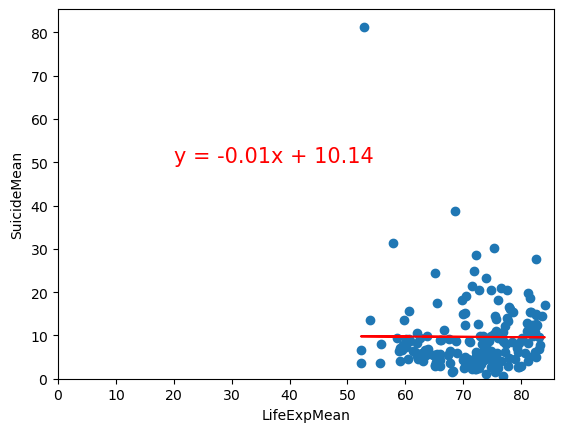

In [95]:
xlbl = "LifeExpMean"
ylbl = "SuicideMean"
lblpos = (20, 50)
plotLinearRegression(combined_life_exp_suicide_unemploy_df2['LifeExpMean'],combined_life_exp_suicide_unemploy_df2['SuicideMean'],xlbl,ylbl,lblpos,5)


The r-squared is: 0.20182523966486343


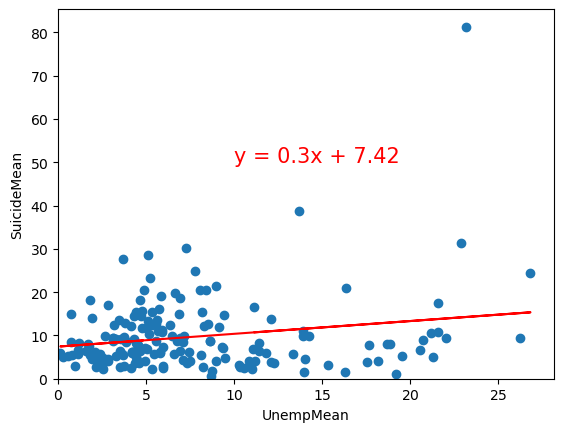

In [97]:
xlbl = "UnempMean"
ylbl = "SuicideMean"
lblpos = (10, 50)
plotLinearRegression(combined_life_exp_suicide_unemploy_df2['UnempMean'],combined_life_exp_suicide_unemploy_df2['SuicideMean'],xlbl,ylbl,lblpos,5)


The mean Suicide Rate of all countrires is: 0       4.06
1       4.60
2       2.56
3       6.16
4       8.62
       ...  
171     2.20
172     7.64
173     5.70
174     8.22
175    15.58
Name: SuicideMean, Length: 176, dtype: float64
NormaltestResult(statistic=32.11734491756776, pvalue=1.0612242475222543e-07)


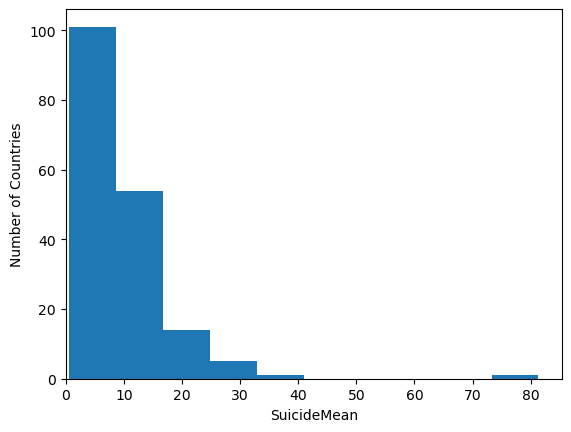

In [103]:
suicide_mean = combined_life_exp_suicide_unemploy_df2['SuicideMean']


print(f"The mean Suicide Rate of all countrires is: {combined_life_exp_suicide_unemploy_df2['SuicideMean']}")
#print(f"The standard deviation of all countries GDP is: {['GdpMean']}")

plt.hist(combined_life_exp_suicide_unemploy_df2['SuicideMean'])
plt.xlabel("SuicideMean")
plt.ylabel("Number of Countries")
#plt.ticklabel_format(useMathText=True)
plt.xlim(0)
plt.ylim(0)
print(st.normaltest(suicide_mean.sample(50)))

plt.show()

In [104]:
len(suicide_mean)

176

In [105]:
# # Run the normality test on the whole Suicide_mean DataFrame                                                                           
print(st.normaltest(suicide_mean.sample(176)))
# If the p-value is 0.05 or lower, the result is trumpeted as significant, 
# but if it is higher than 0.05, the result is non-significant and tends to be passed over in silence

NormaltestResult(statistic=194.22264974657207, pvalue=6.68478551457428e-43)


In [110]:
# calculate standard dviation and mean of means
sd_sr = np.std(suicide_mean,ddof = 0)
mean_sr = np.mean(suicide_mean)
print(f"The suicide mean standard deviation is {sd_numpy}")
print(f'The average suicide rating is {mean_sr}')

The suicide mean standard deviation is 8.377668841292278
The average suicide rating is 9.66511363636364


In [111]:
# Calculate the 68-95-99.7 rule using the standard deviation. WHY IS IT BELOW ZERO???? doesn't work for skewed distributions 

print(f"Roughly 68% of the data is between {round(mean_sr-sd_sr,3)} and {round(mean_sr+sd_sr,3)}")
print(f"Roughly 95% of the data is between {round(mean_sr-2*sd_sr,3)} and {round(mean_sr+2*sd_sr,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_sr-3*sd_sr,3)} and {round(mean_sr+3*sd_sr,3)}")

Roughly 68% of the data is between 1.287 and 18.043
Roughly 95% of the data is between -7.09 and 26.42
Roughly 99.7% of the data is between -15.468 and 34.798
